# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import json

# Import API key
from config2 import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combin<ation
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

655

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "cockburn town"
units = "metric"
# Build query URL
query_url = f"{url}appid={api_key}&q={city}&units={units}"
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=72281b30332f8b81c3087397bf9791c3&q=cockburn town&units=metric


In [4]:
response = requests.get(query_url)

In [5]:
j_response = response.json()

In [6]:
print(json.dumps(j_response,indent = 4, sort_keys = True))

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 21.46,
        "lon": -71.14
    },
    "dt": 1554173331,
    "id": 3576994,
    "main": {
        "grnd_level": 1019.34,
        "humidity": 100,
        "pressure": 1019.34,
        "sea_level": 1019.34,
        "temp": 25.31,
        "temp_max": 25.31,
        "temp_min": 25.31
    },
    "name": "Cockburn Town",
    "sys": {
        "country": "TC",
        "message": 0.0078,
        "sunrise": 1554115058,
        "sunset": 1554159540
    },
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 75.0007,
        "speed": 6.37
    }
}


In [7]:
Valid_Cities = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []


In [8]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

city_index = 1
for city in cities:
    # Build query URL
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    print(f"Retrieving information for {city}...")
    city_json = requests.get(query_url).json()
    try:
        
        Valid_Cities.append(city_json["name"])
        Cloudiness.append(city_json["clouds"]["all"])
        Country.append(city_json["sys"]["country"])
        Date.append(city_json["dt"])
        Humidity.append(city_json["main"]["humidity"])
        Lat.append(city_json["coord"]["lat"])
        Lng.append(city_json["coord"]["lon"])
        Max_Temp.append(city_json["main"]["temp_max"])
        Wind_Speed.append(city_json["wind"]["speed"])
        0print("Success")
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")
        
    
        
    
    city_index = city_index + 1


Retrieving information for udachnyy...
Success
------------
Retrieving information for bankja...
Missing field/result... skipping.
------------
Retrieving information for san cristobal...
Success
------------
Retrieving information for ushuaia...
Success
------------
Retrieving information for itoman...
Success
------------
Retrieving information for moindou...
Success
------------
Retrieving information for newport...
Success
------------
Retrieving information for rock sound...
Success
------------
Retrieving information for leningradskiy...
Success
------------
Retrieving information for rikitea...
Success
------------
Retrieving information for jacareacanga...
Success
------------
Retrieving information for tasiilaq...
Success
------------
Retrieving information for punta arenas...
Success
------------
Retrieving information for shestakovo...
Success
------------
Retrieving information for muhos...
Success
------------
Retrieving information for matveyevka...
Success
------------
R

Success
------------
Retrieving information for souillac...
Success
------------
Retrieving information for bilibino...
Success
------------
Retrieving information for bethel...
Success
------------
Retrieving information for geraldton...
Success
------------
Retrieving information for krapivinskiy...
Success
------------
Retrieving information for namatanai...
Success
------------
Retrieving information for batagay-alyta...
Success
------------
Retrieving information for hanting...
Success
------------
Retrieving information for kahului...
Success
------------
Retrieving information for jagdalpur...
Success
------------
Retrieving information for salalah...
Success
------------
Retrieving information for castro...
Success
------------
Retrieving information for college...
Success
------------
Retrieving information for haines junction...
Success
------------
Retrieving information for ilulissat...
Success
------------
Retrieving information for rocha...
Success
------------
Retrieving

Success
------------
Retrieving information for george...
Success
------------
Retrieving information for rundu...
Success
------------
Retrieving information for shahrud...
Success
------------
Retrieving information for mariental...
Success
------------
Retrieving information for tarakan...
Success
------------
Retrieving information for oshawa...
Success
------------
Retrieving information for lugovoy...
Success
------------
Retrieving information for denpasar...
Success
------------
Retrieving information for mys shmidta...
Missing field/result... skipping.
------------
Retrieving information for iqaluit...
Success
------------
Retrieving information for millinocket...
Success
------------
Retrieving information for beruni...
Missing field/result... skipping.
------------
Retrieving information for cherskiy...
Success
------------
Retrieving information for guhagar...
Success
------------
Retrieving information for palabuhanratu...
Missing field/result... skipping.
------------
Ret

Success
------------
Retrieving information for calabozo...
Success
------------
Retrieving information for marienburg...
Success
------------
Retrieving information for kieta...
Success
------------
Retrieving information for banfora...
Success
------------
Retrieving information for atambua...
Success
------------
Retrieving information for port blair...
Success
------------
Retrieving information for turka...
Success
------------
Retrieving information for narrabri...
Success
------------
Retrieving information for launceston...
Success
------------
Retrieving information for denham springs...
Success
------------
Retrieving information for shingu...
Success
------------
Retrieving information for pandamatenga...
Success
------------
Retrieving information for ranong...
Success
------------
Retrieving information for whitehorse...
Success
------------
Retrieving information for lucapa...
Success
------------
Retrieving information for ixtapa...
Success
------------
Retrieving inform

Missing field/result... skipping.
------------
Retrieving information for jiroft...
Missing field/result... skipping.
------------
Retrieving information for ryotsu...
Success
------------
Retrieving information for tasbuget...
Missing field/result... skipping.
------------
Retrieving information for adeje...
Success
------------
Retrieving information for itoigawa...
Success
------------
Retrieving information for port macquarie...
Success
------------
Retrieving information for burica...
Missing field/result... skipping.
------------
Retrieving information for anloga...
Success
------------
Retrieving information for el chol...
Success
------------
Retrieving information for kilimatinde...
Success
------------
Retrieving information for luderitz...
Success
------------
Retrieving information for hobyo...
Success
------------
Retrieving information for ati...
Success
------------
Retrieving information for beringovskiy...
Success
------------
Retrieving information for meuselwitz...
S

In [39]:
#Convert unix timestamps to dates
useful_Dates = []
for date in Date:
    useful_Dates.append(datetime.utcfromtimestamp(date).strftime('%Y-%m-%d'))



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#Data frame
cities_df = pd.DataFrame({
    "City":Valid_Cities,
    "Cloudiness":Cloudiness,
    "Country":Country,
    "Date":useful_Dates,
    "Humidity":Humidity,
    "Lat":Lat,
    "Lng":Lng,
    "Max_Temp":Max_Temp,
    "Wind_Speed":Wind_Speed
})


In [12]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Udachnyy,92,RU,2019-04-02,80,66.42,112.40,1.61,2.22
1,San Cristobal,75,EC,2019-04-02,93,-0.39,-78.55,14.00,2.10
2,Ushuaia,75,AR,2019-04-02,81,-54.81,-68.31,12.00,2.10
3,Itoman,20,JP,2019-04-02,45,26.12,127.67,19.00,4.60
4,Moindou,20,NC,2019-04-02,62,-21.69,165.68,30.00,7.20


In [42]:
#Saving as CSV
cities_df.to_csv("Resources/cities.csv",index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [43]:
%matplotlib notebook

<IPython.core.display.Javascript object>


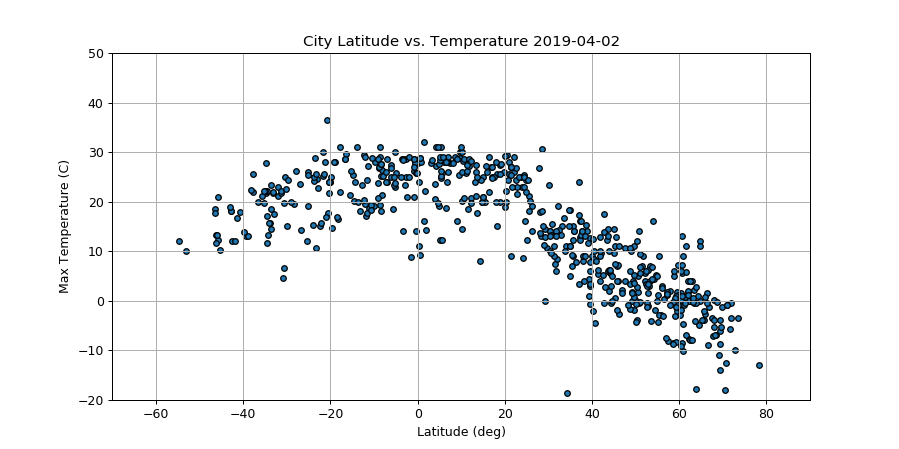

In [44]:
cities_df.plot(kind="scatter", x="Lat", y="Max_Temp", grid=True, figsize=(10,5),edgecolors = "black")

In [45]:
plt.xlim(-70,90)
plt.ylim(-20,50)

(-20, 50)

In [46]:
plt.xlabel("Latitude (deg)")
plt.ylabel("Max Temperature (C)")
date = cities_df["Date"][0]
plt.title(f"City Latitude vs. Temperature {date}")

Text(0.5, 1.0, 'City Latitude vs. Temperature 2019-04-02')

In [60]:
plt.savefig("Images/maxTempVsLatitude.png")

This scatter plot clearly shows the tendency of cities close to the equator to be hotter than cities farther from the equator. Of course this is a generalizations. The correlation shown is weakened by factors unaccounted for such as city elevation, and other weather phenomena such as storms (which significantly affect temperature).

#### Latitude vs. Humidity Plot

In [48]:
%matplotlib notebook

<IPython.core.display.Javascript object>


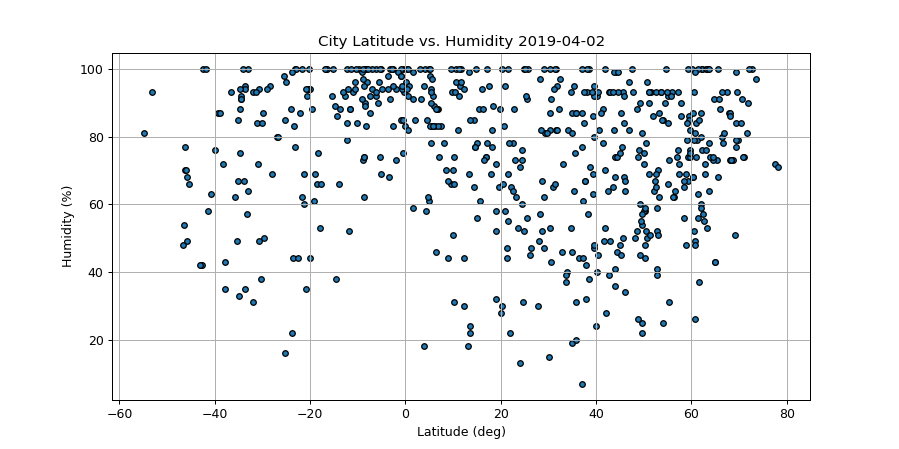

In [49]:
cities_df.plot(kind = "scatter", x = "Lat",y="Humidity",grid = True, figsize =(10,5),edgecolors = "black")

In [50]:
plt.xlabel("Latitude (deg)")
plt.ylabel("Humidity (%)")
date = cities_df["Date"][0]
plt.title(f"City Latitude vs. Humidity {date}")

Text(0.5, 1.0, 'City Latitude vs. Humidity 2019-04-02')

In [61]:
plt.savefig("Images/humidityVsLatitude.png")

The plot shows a relatively few number of cities with low humidity close to the equator, which suggests that dry cities are more likely to be found far from the equator. The graph doesn't necessarily suggest that cities farther from the equator are dryer, because it appears that there are plenty of cities far from the equator are quite humid. Again, other meterological factors have not been taken into account.

#### Latitude vs. Cloudiness Plot

In [52]:
%matplotlib notebook

<IPython.core.display.Javascript object>


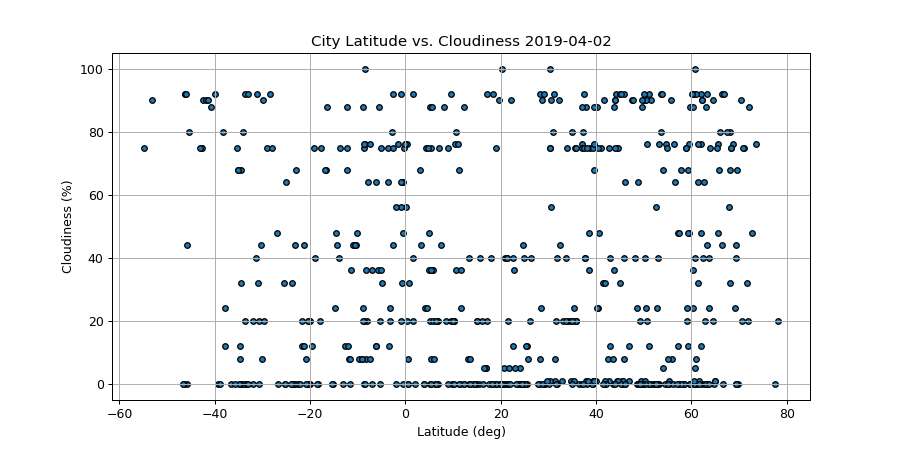

In [53]:
cities_df.plot(kind = "scatter",x="Lat",y ="Cloudiness",grid = True,figsize = (10,5),edgecolors = "black")

In [54]:
plt.xlabel("Latitude (deg)")
plt.ylabel("Cloudiness (%)")
date = cities_df["Date"][0]
plt.title(f"City Latitude vs. Cloudiness {date}")

Text(0.5, 1.0, 'City Latitude vs. Cloudiness 2019-04-02')

In [62]:
plt.savefig("Images/cloudinessVsLatitude.png")

There appear do be bands of cities with cloudiness percentages of 0%, 20%, and close to 80% for all latitudes. This suggests that most cities either have clear skies, about a quarter of cloud cover, or overcast weather conditions.

#### Latitude vs. Wind Speed Plot

In [56]:
%matplotlib notebook

<IPython.core.display.Javascript object>


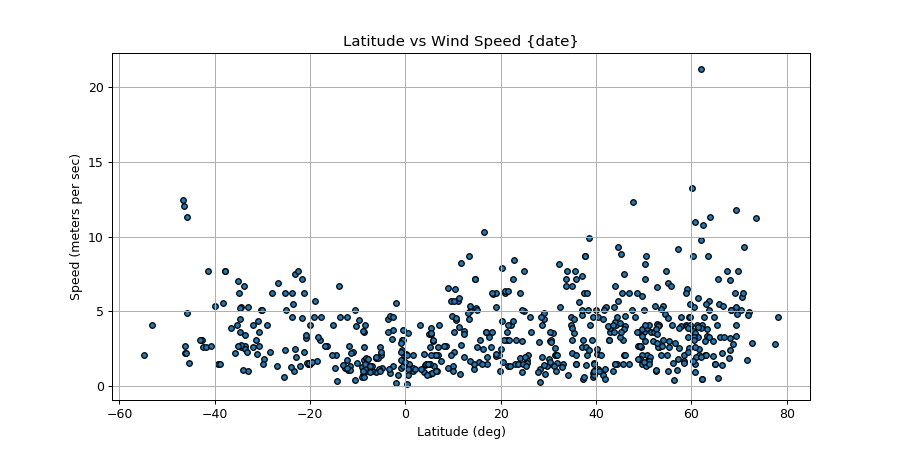

In [57]:
cities_df.plot(kind="scatter",x="Lat",y="Wind_Speed",grid = True,edgecolors = "black",figsize = (10,5))

In [58]:
plt.xlabel("Latitude (deg)")
plt.ylabel("Speed (meters per sec)")
date = cities_df["Date"][0]
plt.title("Latitude vs Wind Speed {date}")

Text(0.5, 1.0, 'Latitude vs Wind Speed {date}')

In [63]:
plt.savefig("Images/windSpeedVsLatitude.png")

There appears to be a convex relationship between latitude and wind speeds, although the correlation is not all that clear. The plot suggests that cities close to the equator tend to be less windy, and those further north or south tend to be more windy. Some cities far up north or south have extremely windy conditions.